<a href="https://colab.research.google.com/github/Njeay/Stage-E/blob/main/Stage_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


!pip install statsmodels
from statsmodels.tsa.stattools import adfuller



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
from google.colab import files
uploaded = files.upload()

Saving Time_series_analysis_and_forecast_DATASET.csv to Time_series_analysis_and_forecast_DATASET (1).csv


In [78]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Time_series_analysis_and_forecast_DATASET.csv']))

In [79]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [80]:
# summarize
print(df.shape)
print(df.head())
df.tail()

(92016, 5)
              FullDate  Tmax   SysLoad  GasPrice  ElecPrice
0  2010-09-01 00:00:00  15.8  1688.215      3.69     23.710
1  2010-09-01 01:00:00  15.8  1669.195      3.69     22.635
2  2010-09-01 02:00:00  15.8  1491.980      3.69     22.565
3  2010-09-01 03:00:00  15.8  1330.760      3.69     18.910
4  2010-09-01 04:00:00  15.8  1247.940      3.69     18.030


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000
92015,2021-02-28 23:00:00,24.3,714.69630,5.4848,62.955


In [81]:
df.dtypes

FullDate      object
Tmax         float64
SysLoad      float64
GasPrice     float64
ElecPrice    float64
dtype: object

In [82]:
#check for missing values
df.isnull().values.any()

False

In [83]:
df.describe()


,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [85]:
# #convert 'date' and 'time' to a time series object and use 'date' as index
from datetime import datetime

df['FullDate'] = pd.to_datetime(df.FullDate)
df.set_index('FullDate', inplace = True)

In [86]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000



**Question 11**
Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?

In [87]:
#downsample data points

df = df.resample('D').sum()

In [88]:
#to check downsampling
df.shape

(3834, 4)

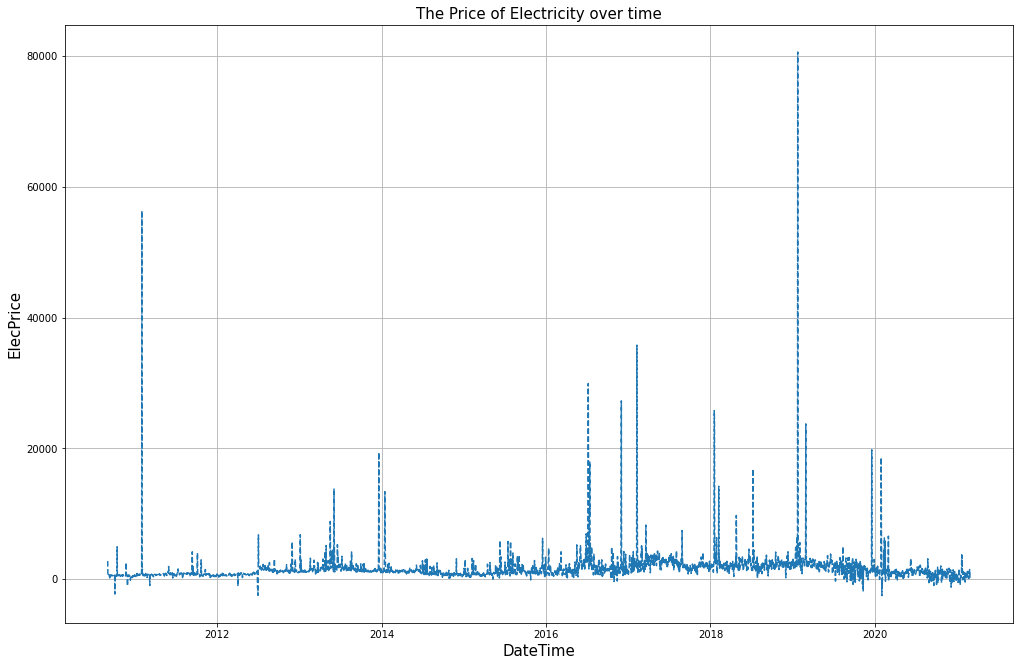

In [89]:
#plot of the daily global_active_power over time
plt.figure(figsize=(17,11))
plt.plot(df.index, df.ElecPrice, '--')
plt.grid()
plt.xlabel('DateTime', fontsize = 15)
plt.ylabel('ElecPrice', fontsize = 15)
plt.title('The Price of Electricity over time', fontsize = 15)
plt.show()

Question 12

Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?

In [90]:
#testing for stationarity
adf_rslt = adfuller(df['SysLoad'])
print(f' p-value of SysLoad = {round(adf_rslt[1],6)}')

 p-value of SysLoad = 0.004254


In [91]:
adf_rslt = adfuller(df['GasPrice'])
print(f'p-value of GasPrice = {round(adf_rslt[1],6)}')

p-value of GasPrice = 0.045027



**Question 13** 
Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?

In [92]:

adf_rslt = adfuller(df['GasPrice'])
print(f'ADF Statistic= {adf_rslt[0]}')
print('Critical Values =')

for k, v in adf_rslt[4].items():
 print(f'{k} : {round(v,4)}')

ADF Statistic= -2.90276669716518
Critical Values =
1% : -3.4321
5% : -2.8623
10% : -2.5672


In [93]:
#Electricity Price
adf_rslt = adfuller(df['ElecPrice'])
print(f'ADF Statistic= {adf_rslt[0]}')
print('Critical Values=')

for k, v in adf_rslt[4].items():
 print(f'{k} : {round(v,4)}')

ADF Statistic= -8.269053866873803
Critical Values=
1% : -3.4321
5% : -2.8623
10% : -2.5672


**QUESTION 14 - 16
Using the daily sampling rate (sum), divide the data into a train and test set. The first 2757 days is your train set and the last (x-2757) days is your test set. Where x is the length of the dataset. Use Facebook Prophet to train a Univariate time series model using the FullDate column as (‘dt’ or ‘ds’) and ElecPrice as ( ‘y’). Answer question 14 - 16**

In [94]:
# reset index
df_daily = df.reset_index()
df_daily.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [95]:
# select columns for predictive model
model_data = df_daily[['FullDate', 'ElecPrice']]

#rename columns to 'ds' and 'y' respectively
model_data = model_data.rename(columns={'FullDate':'ds', 'ElecPrice':'y'})

model_data.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [96]:
# assign train and test data
train = model_data[:2757]
test = model_data[2757:]

In [97]:
print('train shape', train.shape)
print('test shape', test.shape)

train shape (2757, 2)
test shape (1077, 2)


In [98]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)

In [101]:
!pip install pystan~=2.14
!pip install fbprophet
#time series   
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from fbprophet import Prophet




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 137 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.5 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6639088 sha256=2258d564ce6f4243315fb7dd2edc1d1d8ff933e7d3b94d788198b18705924e43
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the 

In [102]:
model = Prophet() 

model.fit(train[['ds', 'y']])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [103]:
test_pred = test[['ds']]
forecast = model.predict(test_pred)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,248.244588,4961.403072,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,344.310000,5082.784069,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,282.916516,5201.711910,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,-85.610341,4889.959536,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-145.098509,4671.071642,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


In [104]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(test.y, forecast.yhat) * 100
print("The MAPE is :",round(mape,2))

The MAPE is : 549.48


In [105]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test.y, forecast.yhat))
print("The MAPE is :", round(rms,2))

The MAPE is : 3218.16


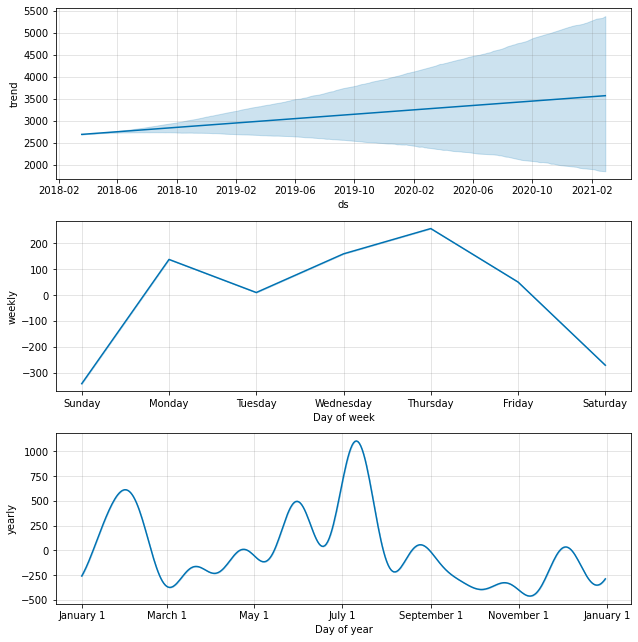

In [106]:
model.plot_components(forecast)
plt.show()


**QUESTIONS 17-19**

In [107]:
df_daily.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [108]:
df_daily.rename(columns = {'FullDate':'ds', 'ElecPrice':'y'}, inplace = True)

In [110]:
df_train = df_daily[['ds', 'SysLoad', 'Tmax', 'GasPrice', 'y']]

In [111]:
model2 = Prophet()
model2.add_regressor('SysLoad')
model2.add_regressor('Tmax')
model2.add_regressor('GasPrice')
model2.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [112]:
# assign train and test data
train1 = df_train[:2757]
test1 = df_train[2757:]

In [114]:
df_Tpred = test1[['ds', 'SysLoad', 'Tmax', 'GasPrice']]
forecast2 = model2.predict(df_Tpred)

In [115]:
from sklearn.metrics import mean_absolute_percentage_error

mape1 = mean_absolute_percentage_error(test1.y, forecast2.yhat) * 100
round(mape1,2)

104.96

In [116]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test1.y, forecast2.yhat))
round(rms,2)

2599.61

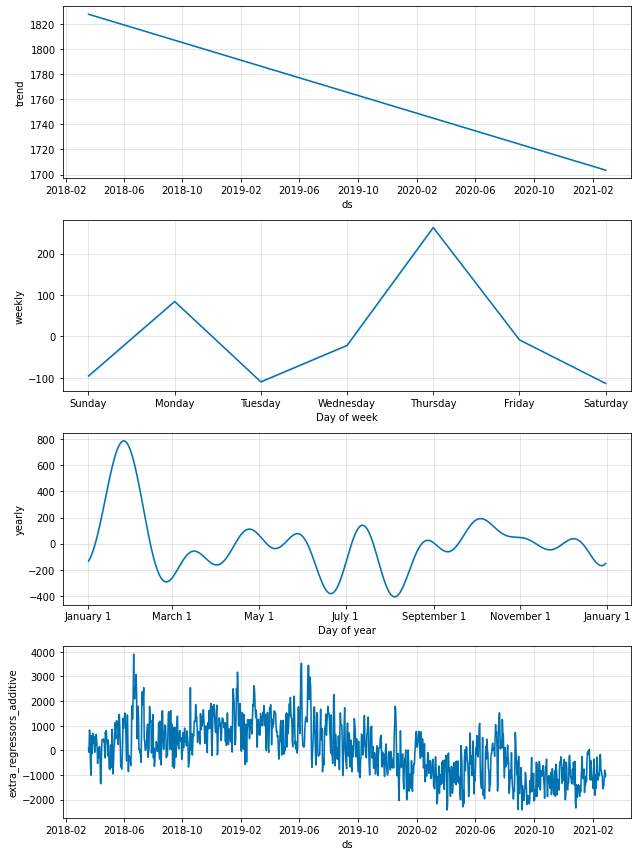

In [117]:
model2.plot_components(forecast2)
plt.show()